# **1. Import Modules**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **2. Import Data**

In [2]:
filePath = 'Data/Bank Customer Churn Prediction.csv'

In [23]:
df = pd.read_csv(filePath)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [16]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [17]:
df[df.isnull().any(axis=1)].sum()

customer_id         0.0
credit_score        0.0
country             0.0
gender              0.0
age                 0.0
tenure              0.0
balance             0.0
products_number     0.0
credit_card         0.0
active_member       0.0
estimated_salary    0.0
churn               0.0
dtype: float64

# **3. Data Preprocessing**

In [18]:
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.569094e+07,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [24]:
df.drop(columns='customer_id', inplace=True)
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [21]:
df['country'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: country, dtype: int64

In [25]:
df['country'] = df['country'].apply(lambda x: 1 if x == 'France' else 0)
df['country'].value_counts()

1    5014
0    4986
Name: country, dtype: int64

In [26]:
df['gender'].value_counts()

Male      5457
Female    4543
Name: gender, dtype: int64

In [29]:
df = pd.get_dummies(df, columns=['gender'], drop_first=True)
df.head(1)

,credit_score,country,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,gender_Male
0,619,1,42,2,0.0,1,1,1,101348.88,1,0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   country           10000 non-null  int64  
 2   age               10000 non-null  int64  
 3   tenure            10000 non-null  int64  
 4   balance           10000 non-null  float64
 5   products_number   10000 non-null  int64  
 6   credit_card       10000 non-null  int64  
 7   active_member     10000 non-null  int64  
 8   estimated_salary  10000 non-null  float64
 9   churn             10000 non-null  int64  
 10  gender_Male       10000 non-null  uint8  
dtypes: float64(2), int64(8), uint8(1)
memory usage: 791.1 KB


In [33]:
col_scale = ['credit_score', 'age', 'tenure', 'balance', 'estimated_salary']

In [35]:
#scaling data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[col_scale] = scaler.fit_transform(df[col_scale])

In [36]:
df.head()

,credit_score,country,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,gender_Male
0,0.538,1,0.324324,0.2,0.000000,1,1,1,0.506735,1,0
1,0.516,0,0.310811,0.1,0.334031,1,0,1,0.562709,0,0
2,0.304,1,0.324324,0.8,0.636357,3,1,0,0.569654,1,0
3,0.698,1,0.283784,0.1,0.000000,2,0,0,0.469120,0,0
4,1.000,0,0.337838,0.2,0.500246,1,1,1,0.395400,0,0


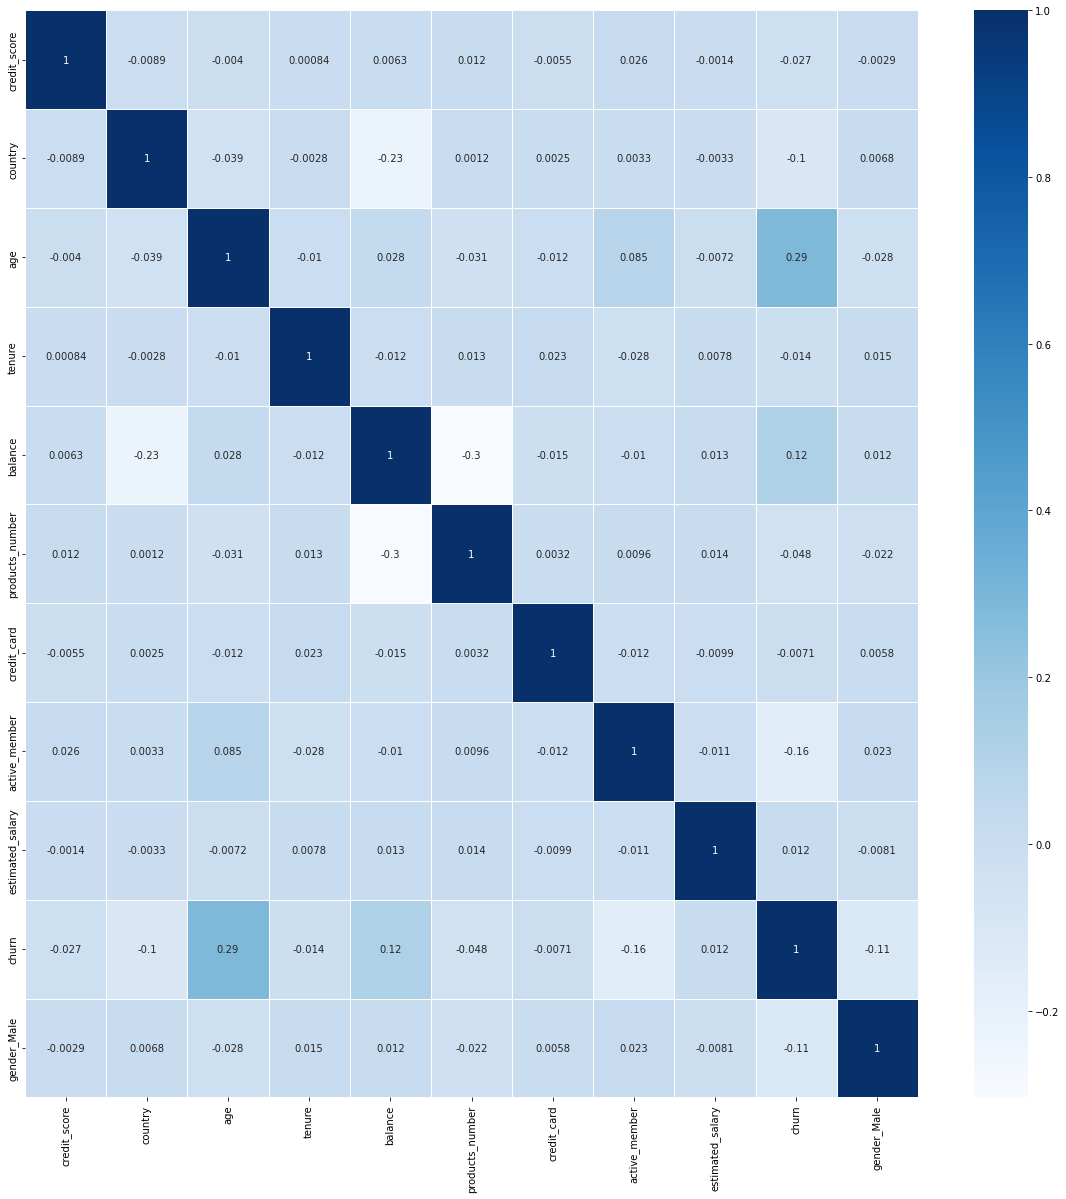

In [42]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, cmap='Blues', linewidths=1)
plt.show()

In [44]:
#train test split
from sklearn.model_selection import train_test_split
X = df.drop(columns='churn')
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
y_train.value_counts()

0    6356
1    1644
Name: churn, dtype: int64

In [46]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)

In [47]:
X_train_bl, y_train_bl = sm.fit_resample(X_train, y_train)

In [48]:
y_train_bl.value_counts()

0    6356
1    6356
Name: churn, dtype: int64

# **4. Modeling**

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

lr = LogisticRegression()

In [50]:
lr.fit(X_train_bl, y_train_bl)

LogisticRegression()

In [51]:
y_pred = lr.predict(X_test)

In [52]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1144,  463],
       [ 122,  271]], dtype=int64)

In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.71      0.80      1607
           1       0.37      0.69      0.48       393

    accuracy                           0.71      2000
   macro avg       0.64      0.70      0.64      2000
weighted avg       0.80      0.71      0.73      2000



In [ ]:
cf = confusion_matrix(y_test, y_pred, labels='churn')

In [54]:
#random forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train_bl, y_train_bl)

y_pred_rf = rf.predict(X_test)

print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      1607
           1       0.54      0.59      0.56       393

    accuracy                           0.82      2000
   macro avg       0.72      0.73      0.72      2000
weighted avg       0.83      0.82      0.82      2000



In [55]:
#XGBoost
from xgboost import XGBClassifier

xgb = XGBClassifier()

xgb.fit(X_train_bl, y_train_bl)

y_pred_xgb = xgb.predict(X_test)

print(classification_report(y_test, y_pred_xgb))

ModuleNotFoundError: No module named 'xgboost'